## Relax_Challenge Take Home

## 1. Data wrangling

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

#### Examine  - User DataSet

In [2]:
#read the user engagement data
df = pd.read_csv('takehome_user_engagement.csv')
print(df.shape)
df.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [5]:
# convert time_stamp into datetime format
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


#### Exploring Duplicates

In [6]:
#Use to find any duplicates
df['time_stamp'].value_counts().head()

2013-10-13 21:21:37    2
2014-04-08 03:09:54    2
2014-03-07 03:09:54    2
2014-05-10 17:13:38    2
2012-12-08 17:13:38    2
Name: time_stamp, dtype: int64

#### NOTE: 
Appears that some login twice per day

In [7]:
#Use to find any duplicates
df['visited'].value_counts().head()

1    207917
Name: visited, dtype: int64

#### Examine Values By Column

In [8]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
time_stamp,0,0.0
user_id,0,0.0
visited,0,0.0


#### NOTE:
There are no missing data.

In [9]:
#check how many users and how many logins
print('There were {} users and {} total logins'.format(df['user_id'].nunique(), len(df)))

There were 8823 users and 207917 total logins


#### NOTE: 

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user adoption

In [10]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.

def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    
    # first drop duplicate days and sort by day
    
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    # calculate how many days has passed for every 3 logins
    
    passed_days = df['date'].diff(periods=logins-1)
    
    # check if any passed time is less than 7 days
    
    return any(passed_days <= timedelta(days=days))

In [11]:
# run the function on all users

adopted = df.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [12]:
print('There were {} adopted_users out of {} users'.format(sum(adopted), len(adopted)))

There were 1656 adopted_users out of 8823 users


### Examine - User data DataSet

In [13]:
users = pd.read_csv('takehome_users.csv')
print(df.shape)
users.head()

(207917, 3)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


#### NOTE:
Found Missing data by column

In [15]:
missing = pd.concat([users.isnull().sum(), 100 * users.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
object_id,0,0.000
creation_time,0,0.000
name,0,0.000
email,0,0.000
creation_source,0,0.000
opted_in_to_mailing_list,0,0.000
enabled_for_marketing_drip,0,0.000
org_id,0,0.000
last_session_creation_time,3177,26.475
invited_by_user_id,5583,46.525


#### NOTE:
invited_by_user_id has 47% missing values while last_session_creation_time has 26% missing

### Remove Nulls

#### NOTE:
    Now we can assess each column in each dataset for nulls. Let's write a function this time to iterate through the columns to see how much nulls there are

In [16]:
for column in users.columns:
  null_count = len(users[users[column].isna()])
  print("{} : {}".format(column, null_count))

object_id : 0
creation_time : 0
name : 0
email : 0
creation_source : 0
last_session_creation_time : 3177
opted_in_to_mailing_list : 0
enabled_for_marketing_drip : 0
org_id : 0
invited_by_user_id : 5583


#### Examine missing last_session_creation_time & invited_by_user_id

In [17]:
users['last_session_creation_time'].value_counts().head()

1.401868e+09    2
1.401917e+09    2
1.345820e+09    1
1.346390e+09    1
1.396229e+09    1
Name: last_session_creation_time, dtype: int64

In [18]:
users['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
11770.0    11
1525.0     11
2308.0     11
Name: invited_by_user_id, dtype: int64

#### Transform DataSet

In [19]:
# remove non-essential features before data merge
users = users.drop(['name', 'email','org_id', 'invited_by_user_id'], axis=1)

In [20]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0


In [21]:
# convert last_session_creation_time into datetime format
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], format='%Y-%m-%d %H:%M:%S')

In [22]:
# convert creation_time into datetime format
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 562.6+ KB


In [23]:
# calculate user history, defined as number of days between account creation and last use
users['history'] = users['last_session_creation_time'] - users['creation_time']
users['history'] = users['history'].dt.days

In [24]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,history
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,-16183.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,-16025.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,-15784.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,-15847.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,-15723.0


In [25]:
# calculate latest Date, defined as number of days since account creation and now
latest = max(users['creation_time'])
users['latest_date'] = latest - users['creation_time']
users['latest_date'] = users['latest_date'].dt.days

In [26]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,history,latest_date
0,1,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,-16183.0,38
1,2,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,-16025.0,196
2,3,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,-15784.0,437
3,4,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,-15847.0,374
4,5,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,-15723.0,498


In [27]:
# drop the two original columns
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)
users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,latest_date
0,1,GUEST_INVITE,1,0,-16183.0,38
1,2,ORG_INVITE,0,0,-16025.0,196
2,3,ORG_INVITE,0,0,-15784.0,437
3,4,GUEST_INVITE,0,0,-15847.0,374
4,5,GUEST_INVITE,0,0,-15723.0,498


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   history                     8823 non-null   float64
 5   latest_date                 12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


#### Investigate history column

In [29]:
users['history'].describe()

count     8823.000000
mean    -15905.155503
std        215.986725
min     -16221.000000
25%     -16100.500000
50%     -15927.000000
75%     -15724.000000
max     -15492.000000
Name: history, dtype: float64

#### Fill missing value with 50% value

In [30]:
users['history'] = users['history'].fillna(value=-15927)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   history                     12000 non-null  float64
 5   latest_date                 12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


#### Merge user data and "adopted user" variable

In [31]:
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [32]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,latest_date,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,-16183.0,38,0
2,ORG_INVITE,0,0,-16025.0,196,1
3,ORG_INVITE,0,0,-15784.0,437,0
4,GUEST_INVITE,0,0,-15847.0,374,0
5,GUEST_INVITE,0,0,-15723.0,498,0


## 2. EDA

In [33]:
source_rating = pd.crosstab(data["creation_source"], data["adopted_user"])
source_rating

adopted_user,0,1
creation_source,,
GUEST_INVITE,1219,369
ORG_INVITE,2614,574
PERSONAL_PROJECTS,592,172
SIGNUP,1596,302
SIGNUP_GOOGLE_AUTH,1146,239


#### NOTE:

Significantly lower "adopted user" rate in guest_invite and Org_invite, that makes sense because users who got invite probably new the projects and organization which make them less involved.

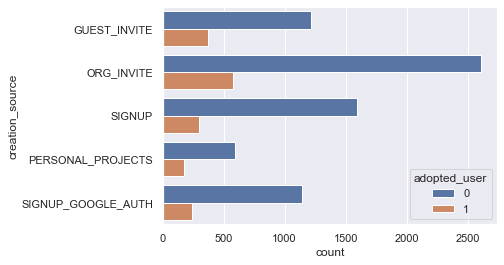

In [34]:
ax = sns.countplot(y='creation_source', hue='adopted_user', data=data)

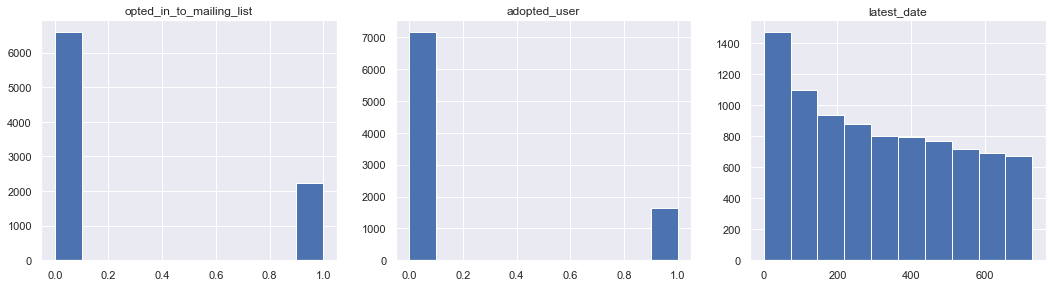

In [35]:
plt.figure(figsize=(18,15))

variables = ['opted_in_to_mailing_list', 'adopted_user' , 'latest_date']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(data[variables[i]])
    plt.title(variables[i])

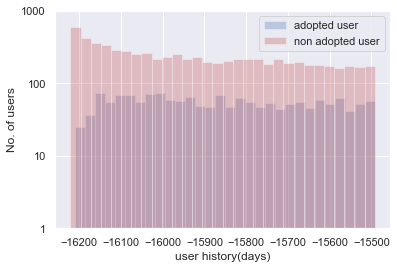

In [36]:
# history and adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(data, 'history', 'user history(days)')

#### NOTE:
The adoption rate is lower in very new accounts. Other than that, the adoption rate didn't change much over the past two years.

## 3. Modeling

In [37]:
#create dummy variables for categorical features (X)
df_features = pd.get_dummies(data,columns=['creation_source'])
df_features.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,history,latest_date,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,
1,1,0,-16183.0,38,0,1,0,0,0,0
2,0,0,-16025.0,196,1,0,1,0,0,0
3,0,0,-15784.0,437,0,0,1,0,0,0
4,0,0,-15847.0,374,0,1,0,0,0,0
5,0,0,-15723.0,498,0,1,0,0,0,0


In [38]:
#set target and drop unuseful columns
y = df_features['adopted_user']
df_features = pd.concat([data, df_features], axis=1).drop('creation_source', axis=1)
X = df_features.drop('adopted_user', axis=1)

### Predictive Models

#### NOTE:
The predictive model of choose will be Random forest algorithm because it can first be used for both classifications and regression task and secondly, it usually provides higher accuracy through cross validation. This Model is also not affectd by the different scales 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#### Split the X and y into 75/25 training and testing data subsets

In [40]:
#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [41]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf.fit(Xtrain,ytrain)
y_pred = rf.predict(Xtest)

In [42]:
print('Random Forest Score: ', rf.score(Xtest,ytest))

Random Forest Score:  0.685856754306437


#### NOTE:
69% accuracy with Random Forest

#### Random Forest with Cross_Validation

In [43]:
print(cross_val_score(rf,Xtest,np.ravel(ytest),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,Xtest,np.ravel(ytest),cv=5)))

[0.71945701 0.72789116 0.72108844 0.70975057 0.70521542]
Mean Cross Validated Score: 0.7166805183611907


#### NOTE:
72% with Cross Validation

### Evaluate Model

In [44]:
print('Accuracy of test set was', accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy of test set was 0.685856754306437
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1792
           1       0.20      0.22      0.21       414

    accuracy                           0.69      2206
   macro avg       0.51      0.51      0.51      2206
weighted avg       0.70      0.69      0.69      2206



#### GridSearchCV Parameter Optimization

In [45]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 10}
Best average precision was 0.7187504138949974


In [46]:
#Running a RandomForestRegressor GridSearchCV to tune the model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameter_candidates = {
    'n_estimators' : [250, 300, 350, 400],
    'min_samples_leaf' : [1, 2, 3],
    'max_depth' : [10, 11, 12],
    'min_samples_split' : [2, 3, 4, 5, 6]
}

RFR_regr = RandomForestRegressor()
CV_RFR_regr = GridSearchCV(estimator=RFR_regr, param_grid=parameter_candidates, n_jobs=5, verbose=2)
CV_RFR_regr.fit(Xtrain, ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [250, 300, 350, 400]},
             verbose=2)

#### Random Forrest - Feature Importance

In [47]:
#Predict with testing set
y_pred = CV_RFR_regr.predict(Xtest)

#Extract feature importances
importances = CV_RFR_regr.best_estimator_.feature_importances_

In [48]:
print(importances)

[0.02739788 0.01611659 0.19524746 0.19123746 0.02562737 0.01678283
 0.19854418 0.19844168 0.03437443 0.03202642 0.02025365 0.02244809
 0.02150196]


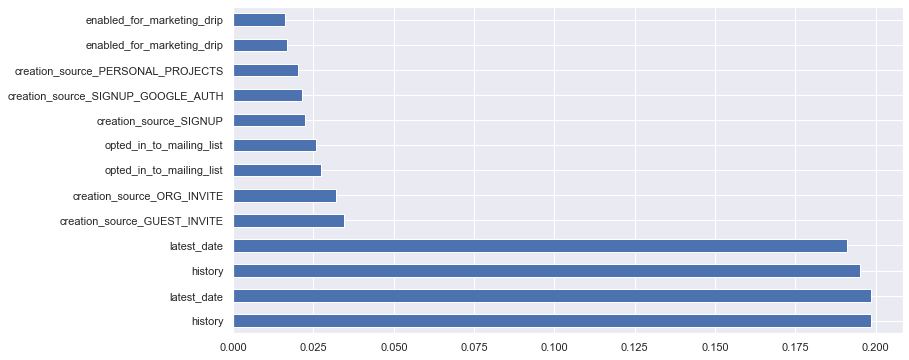

In [49]:
plt.figure(figsize = (12,6))
feat_import = pd.Series(importances, index = X.columns)
feat_import.nlargest(20).plot(kind='barh')
plt.show()

#### CONCLUSION:

The user history is the essential feature. Based on this, I recommend that an effective way to grow adopted users might be to encourage existing users to log in and use the software after they have had accounts for a while.

The following important feature is how the user signed up (if you add the four signup features above). Among the ways they sign up, guest invitations and personal projects are the two categories with the highest user adoption rate. It might be somewhat effective to encourage users to invite others and offer incentives to work on their projects using the software. 